# TTT4185 Machine learning for Speech technology

# Computer assigment 1: Speech analysis

This assignment assumes that the student has knowledge about short-time spectral estimation, linear prediction modeling and cepstral analysis. You should also know the concept of fundamental frequencies and formants.

Useful plotting commands from `matplotlib.pyplot`: `figure`, `plot`, `subplots`, `pcolormesh`



## Problem 1: Time-domain analysis

Included in the Blackboard post about this assignment is the audio file `stry.py`. Download the file then upload it to this Colab session.

The wav file is a recording of the latter half of the English word "tapestry". The phonetic transcription is /s/ /t/ /r/ /iy/.

Here's how you can load it using `scipy.io.wavefile.read` ([documentation here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.read.html))


In [ ]:
import numpy as np
import scipy as sp
import scipy.io.wavfile

from matplotlib import pyplot as plt

Fs, data = scipy.io.wavfile.read('/content/stry.wav')

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Task 1

Plot the signal from the `stry.py` wavfile in the time domain.

What is characteristic about the sounds /s/, /t/, /r/ and /iy/? Can you easily tell apart /r/ and /iy/? Hint: /r/ starts around 0.22 seconds

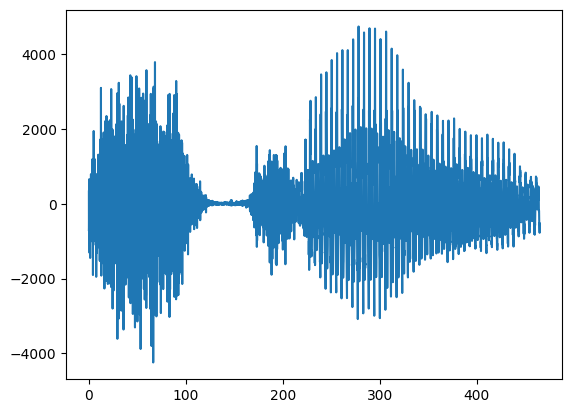

In [15]:
dt = 1/Fs
time = np.arange(0, len(data)*dt, dt) *1000 #ms

plt.plot(time, data)
plt.show()

### Task 2

Take a 40 millisecond subset of the vowel /iy/ and plot it.


### Task 3

Find the fundamental frequency $f_0$ of the vowel

## Problem 2: Spectral analysis


### Task 4

Estimate the spectrum of the vowel using an FFT of length 1024. Plot the spectrum expressed in dBs ($20 \log_{10}(x)$) as a function of frequency.

Useful Python functions: `numpy.fft.fft`, `numpy.abs`,

### Task 5

Multiply the signal by a Hamming window and repeat the last operation. Explain the difference between the two spectra.

Useful Python functions: `scipy.signal.hamming`

### Task 6

Estimate the fundamental frequency $f_0$ using the spectrum. Compare the result to what you got in Task 3.

### Task 7

Roughly estimate the two first formant frequencies.

## Problem 3: Autoregressive (AR) Modeling

### Task 8

Compute the coefficients of an AR model (linear prediction coefficients) with order 4, 8, 16 and 50, based on the vowel.

Useful Python functions: `pysptk.sptk.lpc`, `scipy.signal.freqz`. Check the documentation of the sptk package https://netix.dl.sourceforge.net/project/sp-tk to know which parameters are returned by the `lpc` function, and what model they correspond to.

`pysptk` is not pre-included with the standard Colab workspace, so we need to install in first. The next block has been set up to do so, but may take a minute or so to execute.

In [ ]:
! pip install pysptk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 461.9/461.9 kB 5.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pysptk: filename=pysptk-1.0.1-cp310-cp310-linux_x86_64.whl size=1241860 sha256=81375e46a8137a9b468d91eb5015f951830e824a7f0618053881e21933c84ade
  Stored in directory: /root/.cache/pip/wheels/ba/c2/7f/73c54e1795eeca8f995f95474c8290b78ee0a6306412dc934f
Successfully built pysptk


### Task 9

Estimate the spectrum for each of the model orders. Plot the spectrum in dBs as a function of frequency.

Compare your results with the spectrum from Tasks 5 and 6. Which model order yields the "best" spectral envelope? What happens if the model order is too high or too low?

Why is it not possible to estimate the fundamental frequency based on the LP model?

## Problem 4: Spectrograms

### Task 10

Use `scipy.signal.spectrogram` to create a spectrogram of the entire speech signal. Try to generate both wide- and narrow-band spectrograms by adjusting the window lengths and overlaps. Which characteristic traits of the speech sounds /s/, /t/, /r/ and /iy/ can you see from the spectrogram?

## Problem 5: Cepstrum

In this problem we look at the cepstrum and deconvolution

### Task 11

Compute and plot the real cepstrum of the vowel from Task 3

### Task 12

Use the cepstrum to compute the fundamental frequency $f_0$. Compare your results with those obtained in Tasks 4 and 7.

### Task 13

Use the cepstrum to estimate the spectral envelope.

- Use liftering to extract the part of the ceptrum that represents the spectral envelope.
- Plot the spectral envelope as a function of frequency, and compare the result with the results from Task 10.

Hint 1: Remember that the cepstrum of a real signal is symmetric, so the liftered signal mus be symmetric as well.

Hint 2: The FFT of a real, symmtric signal is real, but due to round-off errors small imaginary noise may occur. Use `np.real` to get to the real part of the liftered log-spectrum.